In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:

prices_path_1 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-1.csv"
prices_path_2 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-2.csv"
prices_path_0 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-0.csv"
df = pd.read_csv(prices_path_0, sep=";")
df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
df['spread'] = (df['ask_price_1']-df['bid_price_1'])
print(df.columns.values.tolist())

# create dataframes for separate instruments and calculate rolling averages
df_am = df.loc[df["product"] == "AMETHYSTS"]
df_am['it'] = df_am['timestamp']/100
df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()

df_star = df.loc[df["product"] == "STARFRUIT"]
df_star['it'] = df_star['timestamp']/100
df_star['20it_rolling'] = df_star['mid_price'].rolling(20).mean()


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\reves\AppData\Local\Temp\ipykernel_10140\2860068583.py:1: SyntaxWarning: invalid escape sequence '\P'
  prices_path_1 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-1.csv"
C:\Users\reves\AppData\Local\Temp\ipykernel_10140\2860068583.py:2: SyntaxWarning: invalid escape sequence '\P'
  prices_path_2 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-2.csv"
C:\Users\reves\AppData\Local\Temp\ipykernel_10140\2860068583.py:1: SyntaxWarning: invalid escape sequence '\P'
  prices_path_1 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_round_1_day_-1.csv"
C:\Users\reves\AppData\Local\Temp\ipykernel_10140\2860068583.py:2: SyntaxWarning: invalid escape sequence '\P'
  prices_path_2 = "D:\Projects\IMC_Challenge\Round_1\historic_data\prices_

FileNotFoundError: [Errno 2] No such file or directory: 'D:/Projects/IMC_Challenge/Round_1/historic_data/prices_round_1_day_-0.csv'

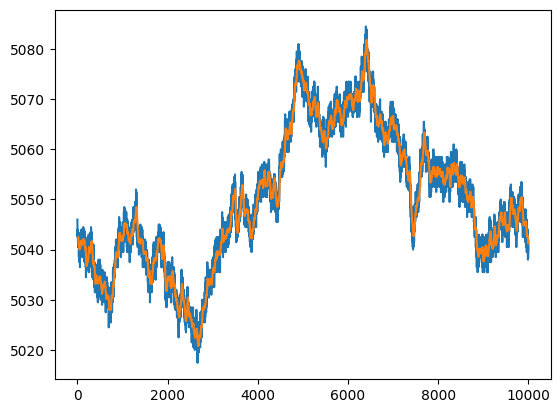

In [28]:
plt.plot(df_star['it'],df_star['mid_price'])
plt.plot(df_star['it'],df_star['20it_rolling'])

In [31]:
plt.plot(df_am['it'][:300], df_am['spread'][:300],'.')
#plt.plot(df_am['it'],df_am["20it_rolling"])

KeyError: 'spread'